## **Terryanda Naufaldo Arhaby**

## **1103213107**

In [12]:
# Mengimpor pustaka yang diperlukan

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [13]:
# Load dataset dari file yang diunggah
file_path = '/content/FinancialMarket.csv'
data = pd.read_csv(file_path)

# Menampilkan beberapa baris pertama dari dataset untuk melihat strukturnya
data.head()

,x,combined_data
0,0.00000,0.003073
1,0.01001,0.033492
2,0.02002,-0.027269
3,0.03003,0.176319
4,0.04004,-0.006027


In [14]:
# Memisahkan fitur (x) dan target (y)
X = data[['x']]
y = data['combined_data']

# Memisahkan data menjadi data latih dan data uji (80% data latih, 20% data uji)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# 1. Model Regresi Linear Biasa

# Inisialisasi model regresi linear
lin_reg = LinearRegression()

# Melatih model pada data latih
lin_reg.fit(X_train, y_train)

# Memprediksi pada data uji
y_pred_linear = lin_reg.predict(X_test)

# Evaluasi model
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
r2_linear = r2_score(y_test, y_pred_linear)

In [16]:
# 2. Model Regresi Linear dengan Basis Fungsi (Polynomial Degree 2)

# Menggunakan PolynomialFeatures untuk membuat fitur polinomial derajat 2
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Inisialisasi model regresi linear
poly_reg = LinearRegression()

# Melatih model pada data latih dengan fitur polinomial
poly_reg.fit(X_train_poly, y_train)

# Memprediksi pada data uji dengan fitur polinomial
y_pred_poly = poly_reg.predict(X_test_poly)

# Evaluasi model
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
r2_poly = r2_score(y_test, y_pred_poly)

In [17]:
# Menampilkan hasil evaluasi dari kedua model
{
    "Regresi Linear Biasa": {"MSE": mse_linear, "RMSE": rmse_linear, "R-Squared": r2_linear},
    "Regresi Linear Dengan Basis Fungsi (Degree 2)": {"MSE": mse_poly, "RMSE": rmse_poly, "R-Squared": r2_poly}
}

{'Regresi Linear Biasa': {'MSE': 9.401377787555104,
  'RMSE': 3.0661666274935393,
  'R-Squared': 0.6781603066194921},
 'Regresi Linear Dengan Basis Fungsi (Degree 2)': {'MSE': 1.3480931930431028,
  'RMSE': 1.161074154842447,
  'R-Squared': 0.9538503919636472}}

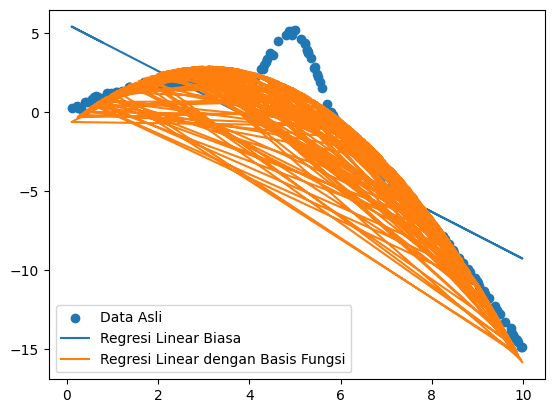

In [22]:
# Plot hasil prediksi

plt.scatter(X_test, y_test, label='Data Asli')
plt.plot(X_test, y_pred_linear, label='Regresi Linear Biasa')
plt.plot(X_test, y_pred_poly, label='Regresi Linear dengan Basis Fungsi')
plt.legend()
plt.show()